# Gradcam text example


## References
***
- Darkon Documentation: http://darkon.io
- Darkon Github: https://github.com/darkonhub/darkon
- More examples: https://github.com/darkonhub/darkon-examples


## prepare
***
for cpu
```
pip install -r requirements.txt
pip install tensorflow
```

for gpu
```
pip install -r requirements.txt
pip install tensorflow-gpu
```

## Import packages

In [4]:
import darkon
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.contrib import learn
%matplotlib inline

##### example sentences and preprocess the sentences

In [5]:
tf.reset_default_graph()
x_raw_pos =["sensitive ensemble performances and good period reconstruction add up to a moving tragedy with some buoyant human moments ."]
x_raw_neg = ["fails to convince the audience that these brats will ever be anything more than losers . "]
vocab_path = "test/data/sequence/vocab"
vocab_processor = learn.preprocessing.VocabularyProcessor.restore(vocab_path)
x_test_batch_pos = np.array(list(vocab_processor.transform(x_raw_pos)))
x_test_batch_neg = np.array(list(vocab_processor.transform(x_raw_neg)))
y_test_batch = [[1.0, 0.0]]

##### get pretrained text cnn network

In [6]:
sess = tf.InteractiveSession()
# Load the saved meta graph and restore variables
checkpoint_file = "test/data/sequence/model-30000"
saver = tf.train.import_meta_graph("{}.meta".format(checkpoint_file))
saver.restore(sess, checkpoint_file)
graph = tf.get_default_graph()   
input_x = graph.get_operation_by_name("input_x").outputs[0]
input_y = graph.get_operation_by_name("input_y").outputs[0]
dropout_keep_prob = graph.get_operation_by_name("dropout_keep_prob").outputs[0]

INFO:tensorflow:Restoring parameters from test/data/sequence/model-30000


##### get candidates of featuremap operations and output operations

In [7]:
conv_op_names = darkon.Gradcam.candidate_featuremap_op_names(sess, 
    feed_options={input_x: x_test_batch_pos, input_y:y_test_batch, dropout_keep_prob:1.0})

print('candidate list of featuremap operation names')
for conv_name in conv_op_names[-10:]:
    print(conv_name)
#print("list of conv_op:{}".format(conv_op_names[-10:]))
                
prob_op_names = darkon.Gradcam.candidate_predict_op_names(sess, 2,
    feed_options={input_x: x_test_batch_pos, input_y: y_test_batch, dropout_keep_prob:1.0})

print('\ncandidate list of prediction operation names')
for prob_name in prob_op_names[-5:]:
    print(prob_name)
#print("list of prob_op:{}".format(prob_op_names[-5:]))

candidate list of featuremap operation names
embedding/ExpandDims
conv-maxpool-3/conv
conv-maxpool-3/BiasAdd
conv-maxpool-3/relu
conv-maxpool-4/conv
conv-maxpool-4/BiasAdd
conv-maxpool-4/relu
conv-maxpool-5/conv
conv-maxpool-5/BiasAdd
conv-maxpool-5/relu

candidate list of prediction operation names
input_y
output/scores/MatMul
output/scores


choose 'conv-maxpool-4/relu' as featuremap operation and choose 'output/scores' as prediction operations

In [8]:
conv_name = 'conv-maxpool-4/relu' 
prob_name = 'output/scores'

Get gradcam result of positive sentiment sentences

In [9]:
x_test_pos = x_test_batch_pos[0]
insp = darkon.Gradcam(input_x, 2, conv_name, prob_name, graph=graph)
ret = insp.gradcam(sess, x_test_pos, feed_options={dropout_keep_prob: 1})
idx = np.argsort(ret['heatmap'][0])[::-1]

plot heatmap of the words in sentences

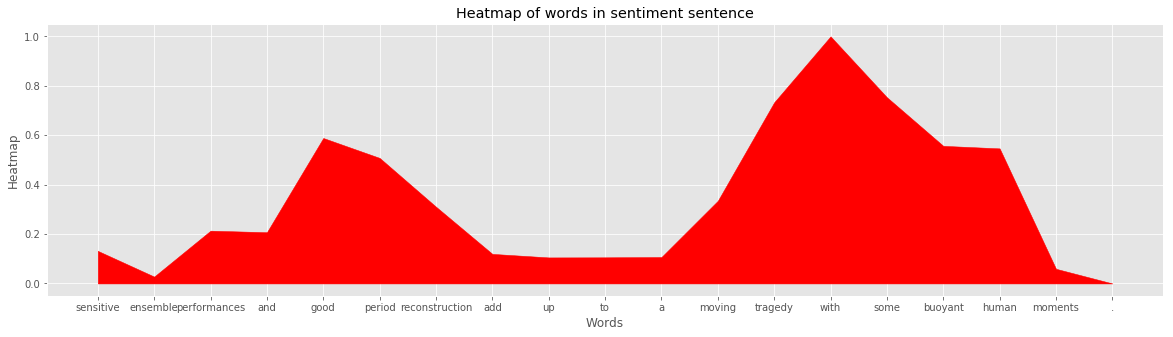

In [10]:
words_pos = x_raw_pos[0].split()
plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(words_pos)]
plt.figure(figsize=(20,5))
plt.fill_between(x_pos, ret['heatmap'][0][:len(words_pos)],  color='r')
plt.xlabel("Words")
plt.ylabel("Heatmap")
plt.title("Heatmap of words in sentiment sentence")
plt.xticks(x_pos, words_pos)
plt.show()

Get gradcam result of negative sentiment sentences

In [11]:
x_test_neg = x_test_batch_neg[0]
insp = darkon.Gradcam(input_x, 2, conv_name, prob_name, graph=graph)
ret = insp.gradcam(sess, x_test_neg,feed_options={dropout_keep_prob: 1})
idx = np.argsort(ret['heatmap'][0])[::-1]

plot heatmap of the words in sentences

fails to convince the audience that these brats will ever be anything more than losers . 


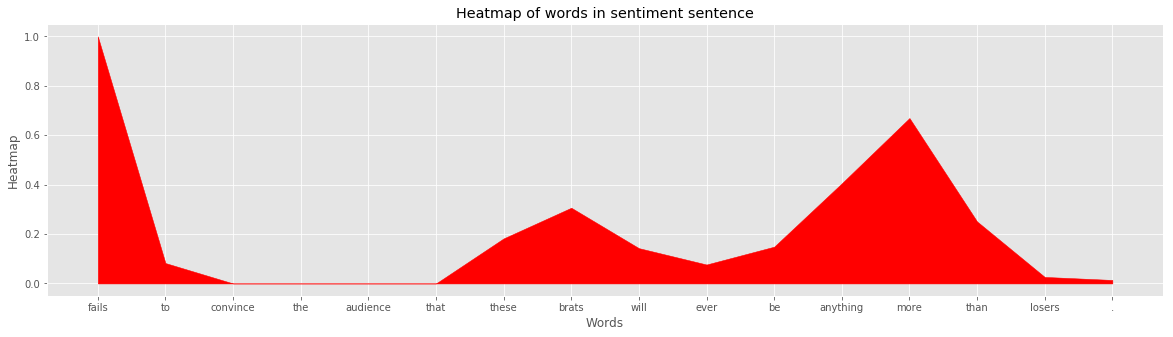

In [12]:
words_neg = x_raw_neg[0].split()
print(x_raw_neg[0])
plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(words_neg)]
plt.figure(figsize=(20,5))
plt.fill_between(x_pos, ret['heatmap'][0][:len(words_neg)],  color='r')
plt.xlabel("Words")
plt.ylabel("Heatmap")
plt.title("Heatmap of words in sentiment sentence")
plt.xticks(x_pos, words_neg)
plt.show()